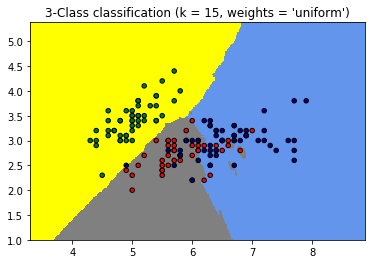

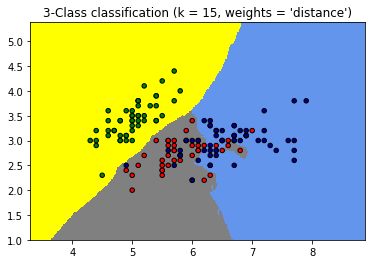

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris() # iris 데이타 업로드
#print(iris)

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2] # iris 데이타 중 너비,높이를 x값으로 지정
y = iris.target # y값으로 타겟 (꽃 종)
#print(y)
h = .02  # step size in the mesh #그물망에서  좌표사이의 거리

# Create color maps
cmap_light = ListedColormap(['Yellow', 'gray', 'cornflowerblue']) #맵색깔
cmap_bold = ListedColormap(['green', 'red', 'darkblue'])#점색깔

for weights in ['uniform', 'distance']:    # weights = "uniform"은 가까운 이웃들의 단순한 평균을 구하는 것, weights = "distance" 는 각 이웃이 얼마나 가까이 있는지에 따라 가중 평균(weighted average)을 구하는 것 
                                                   # 거리가 가까울수록 데이터가 더 유사할 것이라고 보고 가중치를 부여하는 거다.    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) # knn 적용 n_neighbors는 위에서 지정한 15, weights은 uniform과, distance 
    clf.fit(X, y)# knn 적용

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # x데이터의 첫번째값인 꽃잎길이의 최소값 -1, 최대값 +1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # x데이터의 두번째값인 꽃잎너비의 최소값 -1, 최대값 +1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), # 격자의 교차점 좌표를 편리하게 다룰 수 있도록 값을 리턴하는 함수
                         np.arange(y_min, y_max, h)) # x와 y의 범위까지의 정수를 좌표로 하는 교차점의 위치를 찍어주는 코드, 
                                                     # 즉, 꽃잎길이, 꽃잎너비가 분포하는 좌표격자 교차점을 h의 간격으로 만듦

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # xx,yy를 ravel()이용해 1차원 배열로 한줄로 쭉만듦

    # Put the result into a color plot
    Z = Z.reshape(xx.shape) # Z를 reshape()을 이용해 원래 배열 모양으로 복원
    plt.figure() # 시각화 그래프 사이즈 (현재 default 값)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light) # xx,yy,Z 의 좌표와 배경색 설정 cmap_light는 이미 위에서 설정해줌

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, 
                edgecolor='k', s=20) # X 데이터 첫번째, 두번째값으로 분포도 작성, c는 점의 색, cmap은 color mapping (여기서는 y와 cmap_bold를 매칭해준다), edgecolor는 가장자리 색깔, s는 마커크기
    plt.xlim(xx.min(), xx.max()) # X축 범위 시각화
    plt.ylim(yy.min(), yy.max()) # y축 범위 시각화
    plt.title("3-Class classification (k = %i, weights = '%s')" # 타이틀 설정/ k개수와 가중치방법
              % (n_neighbors, weights))
    
plt.show() # 값 출력